<font color=Red>**Note**</font>: In order to make your answer stand out, please use colored text to write your answer. For example, the following code sets font color to blue.

<font color=Blue>我是蓝色</font>

**You should put answer to every question in a different cell, so that the result can be displayed clearly. You can also add cells when necessary.** 

**<font color=Red>Feel free to add your own analytical questions and your analysis. Good questions can earn bonus points. But remember to use red bolded font (like this text) to highlight them.</font>**

**Rename your Jupyter Notebook file as classNumber_Name, and send it to this email address(1614688593@qq.com) before due date.**

<font color=Red>**Due Date: 2021-04-21 Wed 23:59**</font>

# Lab 2 Explorative analysis with Pandas

In this exercise, we will continue to work on the video game sales dataset. You will need to practice the data manipulation and preprocessing methods introduced in classroom, then perform explorative analysis and answer some analytical questions. You will also practice the visualization methods.

## Table of Contents:

1. [Data cleaning](#cleaning)
2. [Overall statistics](#overall)
3. [Year wise analysis](#year)
4. [Publisher wise analysis](#publisher)
5. [Platform wise analysis](#platform)
6. [Gerne wise analysis](#gerne)
7. [Global and regional sales analysis](#sales)
8. [Conclusion and decision support analysis](#dss)

**Load dataset**

In [3]:
import pandas as pd

vg=pd.read_csv('./vgsales.csv')

## <a id='cleaning'>1. Data cleaning</a>

This dataset is relatively clean. However, it still contains missing values. In this step, we will perform sanity check of the dataset.

- **【Q1】Count the missing values in each column. Which columns contain missing values and how many are there?** 
- 【Q2】(Optional) Visualize the missing values with the missingno library.
- **【Q3】Drop the missing values.**

Note: in practice, sometimes we might need to fill the missing values, e.g. with the average value, instead of dropping them. Therefore, you should know how to fill the missing values. 

【Q1】

In [3]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

【Q2(optional)】

<AxesSubplot:>

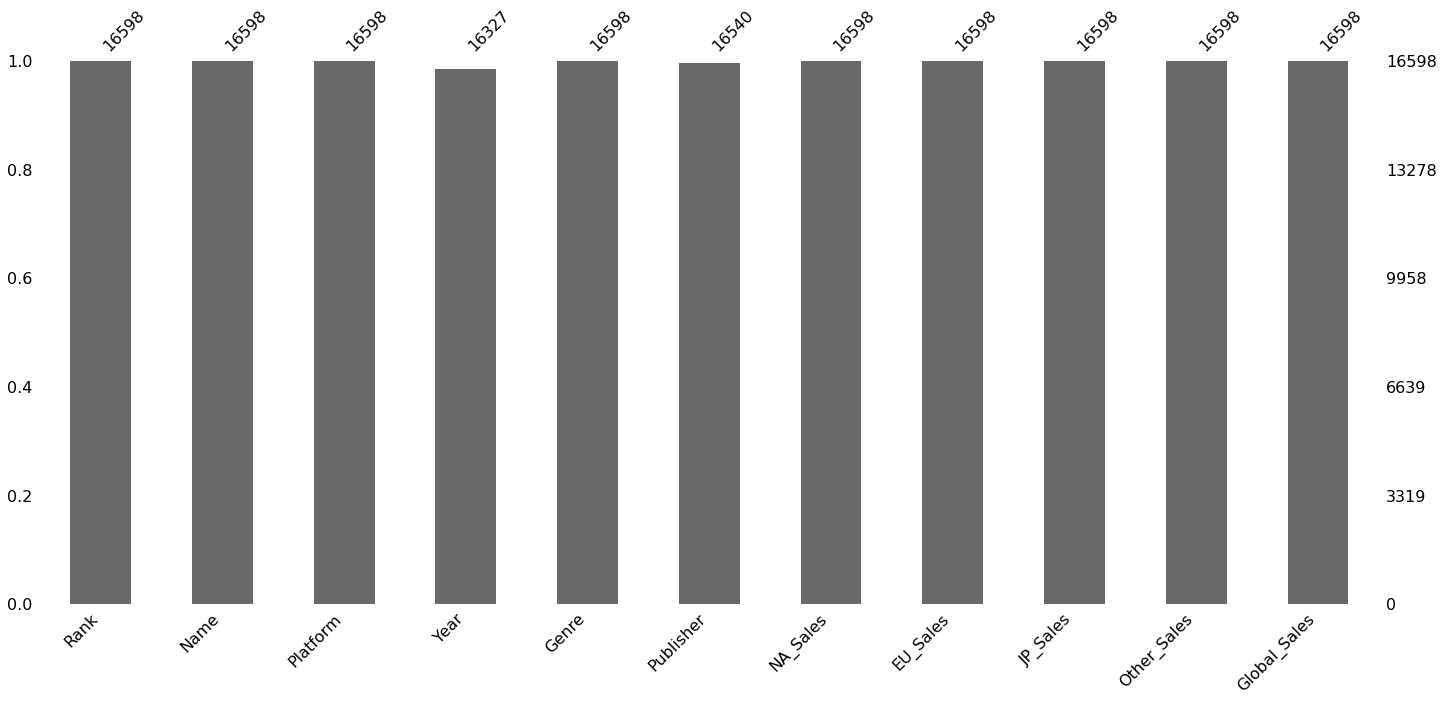

In [6]:
import missingno as mn

mn.bar(vg)

【Q3】

In [7]:
print('before',vg.shape)
vg.dropna(axis=0,inplace=True)
print('after',vg.shape)

before (16598, 11)
after (16291, 11)


## <a id='overall'>2. Overall statistics</a>

- **【Q4】How many games, publishers, platforms and genres are involved in this dataset?**


In [23]:
game=vg[vg.duplicated('Name')==False].shape[0]
publisher=vg[vg.duplicated('Publisher')==False].shape[0]
platform=vg[vg.duplicated('Platform')==False].shape[0]
genre=vg[vg.duplicated('Genre')==False].shape[0]
print('game',game,'publisher',publisher,'platform',platform,'genre',genre)

game 11325 publisher 576 platform 31 genre 12


## 3. <a id='year'>Year wise analysis</a>

Answer the following questions **with code and visualize the results** properly.

- **【Q5】How many games were published in each year?**
- **【Q6】What is the total sales of each year? Try visualize the annual sales with a bar plot.**


【Q5】

<AxesSubplot:xlabel='Year'>

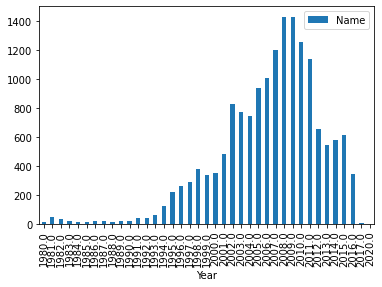

In [34]:
vg[['Name','Year']].groupby('Year').agg({'Name':'count'}).plot(kind='bar')

【Q6】

<AxesSubplot:xlabel='Year'>

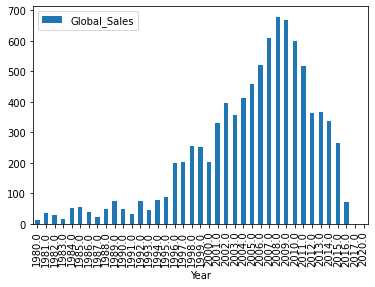

In [36]:
vg[['Year','Global_Sales']].groupby('Year').agg({'Global_Sales':'sum'}).plot(kind='bar')


## 4. <a id='publisher'>Publisher wise analysis</a>
Answer the following questions **with code and visualize the results** properly.

- **【Q5】What are the top five publishers that have published the most games?**
- **【Q6】How many games were published per publisher on average?**
- **【Q7】Compute the profit ratio (sum of sales / #games) for each publisher. What are the most profitable publishers?**
- **【Q8】What's the ranking of publisher Electronic Arts in terms of profit ratio?** 

【Q5】

<AxesSubplot:xlabel='Publisher', ylabel='count'>

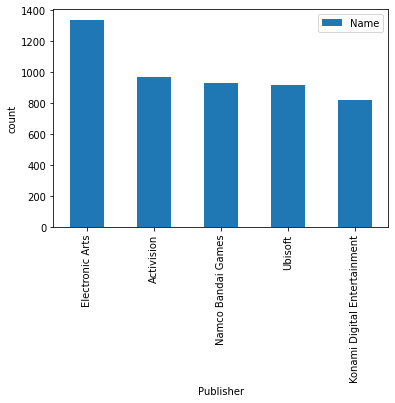

In [40]:
vg3=vg[['Name','Publisher']].groupby('Publisher').agg({'Name':'count'}).sort_values('Name',ascending=False)
vg3.head(5).plot(kind='bar',ylabel='count')

【Q6】

In [4]:
vg=pd.read_csv('./vgsales.csv')
game=vg[vg.duplicated('Name')==False].shape[0]
publisher=vg[vg.duplicated('Publisher')==False].shape[0]

print(game/publisher)

19.849740932642487


In [45]:
vg4=vg[['Name','Publisher']].groupby('Publisher').agg({'Name':'count'}).sort_values('Name',ascending=False)
print(vg4['Name'].sum()/vg4.shape[0])

28.6159169550173


【Q7】

<AxesSubplot:xlabel='Publisher'>

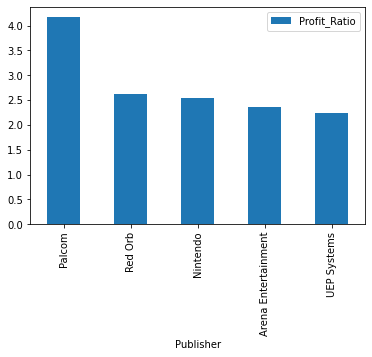

In [72]:
vg[['Name','Publisher','Global_Sales']].groupby('Publisher').agg({'Name':'count','Global_Sales':'sum'})
vg5['Profit_Ratio']=vg5['Global_Sales']/vg5['Name']

vg5=vg5.sort_values('Profit_Ratio',ascending=False).reset_index()
vg5.head(5).plot(x='Publisher',y='Profit_Ratio',kind='bar')

【Q8】

In [75]:
vg5[vg5.Publisher=='Electronic Arts']
#Rank 28

,level_0,index,Publisher,Name,Global_Sales,Profit_Ratio
27,27,27,Electronic Arts,1351,1110.32,0.82185


## 5. <a id='platform'>Platform wise analysis</a>

Answer the following questions **with code and visualize the results** properly.

- **【Q9】How many platforms are there in the dataset?**
- **【Q10】Which platforms are the most popular (with the most number of games)?**
- **【Q11】Which platforms have produced the largest amount of global sales (i.e. with strongest purchase power)?**
- **【Q12】Are they the same globally and in different regions?** For example, are the most popular platforms the same in north America (NA), Europe (EU), and Japan (JP)?

【Q9】

In [82]:
vg[vg.duplicated('Platform')==False].shape[0]

31

【Q10】

<AxesSubplot:xlabel='Platform'>

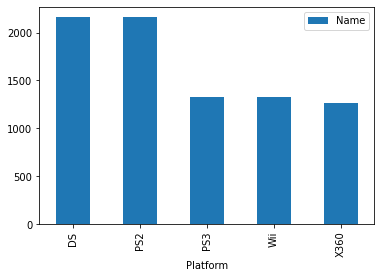

In [83]:
vg[['Name','Platform']].groupby('Platform').agg({'Name':'count'}).sort_values('Name',ascending=False).head(5).plot(kind='bar')

【Q11】

<AxesSubplot:xlabel='Platform'>

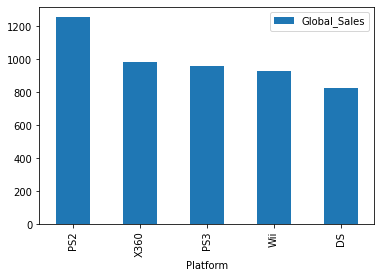

In [84]:
vg[['Global_Sales','Platform']].groupby('Platform').agg({'Global_Sales':'sum'}).sort_values('Global_Sales',ascending=False).head(5).plot(kind='bar')

【Q12】

<AxesSubplot:xlabel='Platform'>

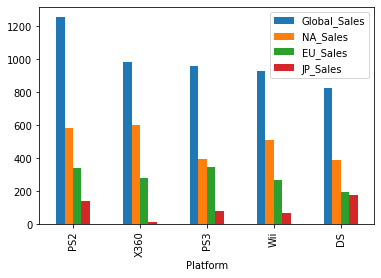

In [85]:
vg[['Global_Sales','Platform','NA_Sales','EU_Sales','JP_Sales']].groupby('Platform').agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum'}).sort_values('Global_Sales',ascending=False).head(5).plot(kind='bar')

## 6. <a id='gerne'>Genre wise analysis</a>

Answer the following questions **with code and visualize the results** properly.

- **【Q13】What are the most popular (#games) / best-selling (largest sales) game genres throughout all these years?**
- **【Q14】How did the annual global sales of each genre change in different years?** That is, which genres are more popular in which years?
- **【Q15】Were these trends the same in different regions?** For example, which genres became more popular in Japan after 2000? 

【Q13】

<AxesSubplot:xlabel='Genre'>

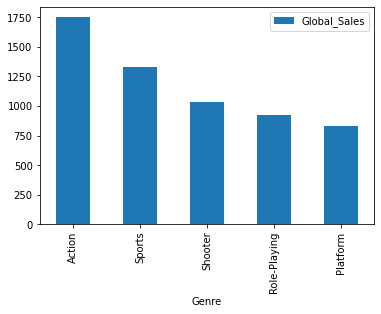

In [87]:
vg[['Global_Sales','Genre']].groupby('Genre').agg({'Global_Sales':'sum'}).sort_values('Global_Sales',ascending=False).head(5).plot(kind='bar')

【Q14】

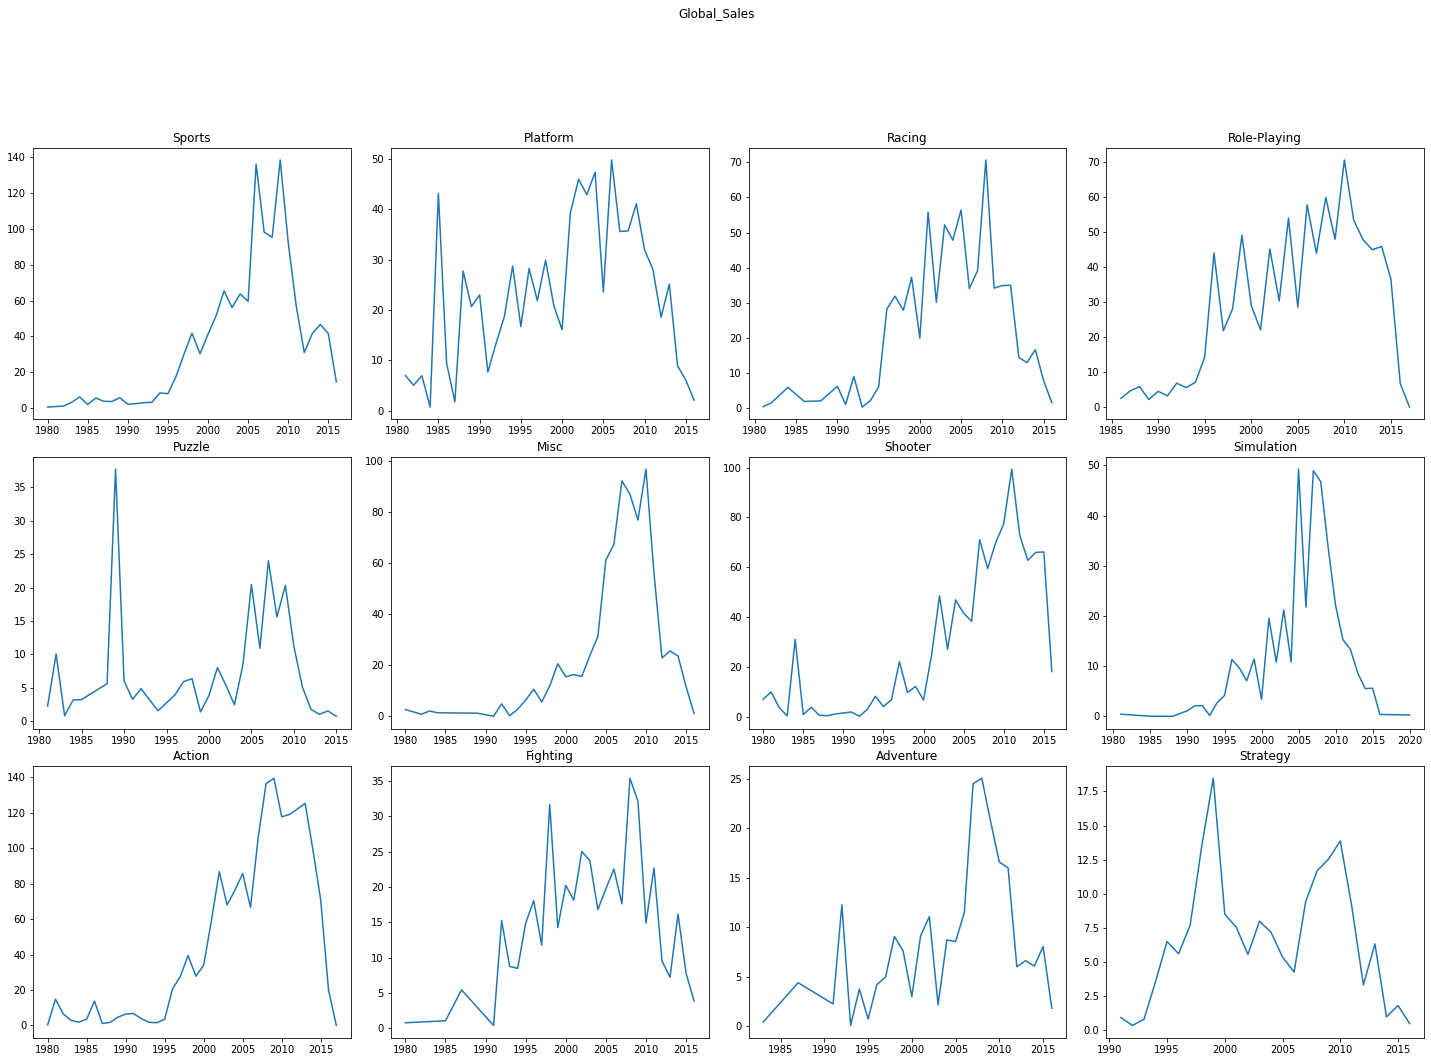

In [57]:
import matplotlib.pyplot as plt

genre=list(vg[vg.duplicated('Genre')==False]['Genre'])

fig=plt.figure(figsize=(20,15))
for i in range(12):
    sp=fig.add_subplot(3,4,i+1)
    df=vg[vg.Genre==genre[i]][['Year','Global_Sales']].groupby('Year').agg({'Global_Sales':'sum'}).reset_index()
    sp.plot(df.Year,df.Global_Sales)
    sp.set_title(genre[i])

fig.tight_layout(h_pad=1)
fig.suptitle('Global_Sales')
plt.subplots_adjust(top=0.85)
plt.show()

【Q15】

<AxesSubplot:xlabel='Genre'>

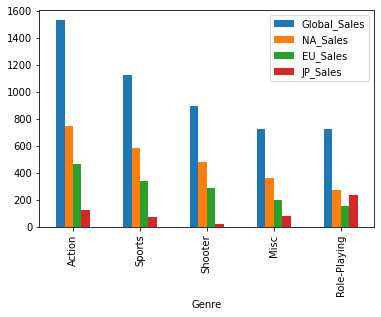

In [100]:
vg6=vg[vg.Year>=2000]
vg6[['Global_Sales','Genre','NA_Sales','EU_Sales','JP_Sales']].groupby('Genre').agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum'}).sort_values('Global_Sales',ascending=False).head(5).plot(kind='bar')

## 7. <a id='sales'>Global and regional sales analysis</a>

Answer the following questions **with code and visualize the results** properly.

- **【Q16】What were the top five best-selling games globally?**
- **【Q17】What were the best-selling games in North America, Europe, and Japan?**
- (Optional) How did the sales of different platforms, publishers vary in different parts of the world across these years?

【Q16】

<AxesSubplot:xlabel='Name'>

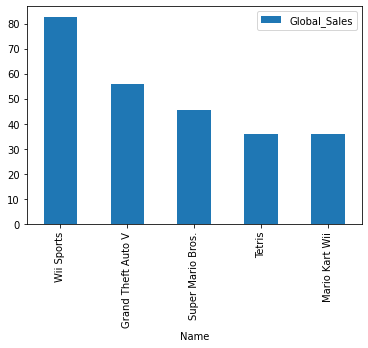

In [101]:
vg[['Global_Sales','Name']].groupby('Name').agg({'Global_Sales':'sum'}).sort_values('Global_Sales',ascending=False).head(5).plot(kind='bar')

【Q17】

In [110]:
vg7=vg[['Name','NA_Sales','EU_Sales','JP_Sales']].groupby('Name').agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum'}).reset_index()
print('NA\n',vg7.sort_values('NA_Sales',ascending=False).head(1),'\nEU\n',vg7.sort_values('EU_Sales',ascending=False).head(1),'\nJP\n',vg7.sort_values('JP_Sales',ascending=False).head(1))


NA
              Name  NA_Sales  EU_Sales  JP_Sales
11007  Wii Sports     41.49     29.02      3.77 
EU
              Name  NA_Sales  EU_Sales  JP_Sales
11007  Wii Sports     41.49     29.02      3.77 
JP
                           Name  NA_Sales  EU_Sales  JP_Sales
7346  Pokemon Red/Pokemon Blue     11.27      8.89     10.22


## 8. <a id='dss'>Conclusion and decision support analysis</a>

You can develop your own analytical questions and find answers. 

**【Q18】If you were the CEO of a game develop company and you are going to develop new games, what would you do? Describe your plan and explain how it was derived from the above analysis.**



In [ ]:
I will do a action game because it's best_selling in global.